In [1]:
%reload_ext autoreload
%autoreload 2

import os

os.environ['NUMEXPR_MAX_THREADS'] = '20'
import logging
logging.getLogger().setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import neptune.new as neptune

from alphabase.spectral_library.flat import SpecLibFlat
from alphabase.spectral_library.base import SpecLibBase
from alphabase.spectral_library.reader import SWATHLibraryReader

from alphadia.extraction.data import TimsTOFDIA
from alphadia.extraction.planning import Plan, Workflow
from alphadia.extraction.calibration import RunCalibration
from alphadia.extraction.candidateselection import MS1CentricCandidateSelection
from alphadia.extraction.scoring import fdr_correction, unpack_fragment_info, MS2ExtractionWorkflow
import alphadia.extraction.utils as utils
yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/raw_data/synchro_PASEF_4prot/20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min_IM0713_200fmol_classical_SyS_4MS_wCE_S4-C3_1_32275.d']

output_location = '/Users/georgwallmann/Documents/data/testing/2_feature_dev'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logging.error('NEPTUNE_TOKEN environtment variable not set')


2023-02-06 17:30:39 WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_jf067g35. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 1,404,666,580,992
2023-02-06 17:30:39 WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
2023-02-06 17:30:39 INFO: 
2023-02-06 17:30:41 INFO: Cupy is not available
2023-02-06 17:30:41 ERROR: NEPTUNE_TOKEN environtment variable not set


2023-02-06 17:30:41 INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
2023-02-06 17:30:42 INFO: renaming precursor_columns columns
2023-02-06 17:30:42 INFO: renaming fragment_columns columns
2023-02-06 17:30:42 INFO: ========= Library Stats =========
2023-02-06 17:30:42 INFO: Number of precursors: 527
2023-02-06 17:30:42 INFO: 	thereof targets:267
2023-02-06 17:30:42 INFO: 	thereof decoys: 260
2023-02-06 17:30:42 INFO: Number of elution groups: 267
2023-02-06 17:30:42 INFO: 	average size: 1.97
2023-02-06 17:30:42 INFO: Number of proteins: 59
2023-02-06 17:30:42 WARNING: No isotope_apex_offset column was found
2023-02-06 17:30:42 INFO: Isotopes Distribution for 6 isotopes
2023-02-06 17:30:42 INFO: =================================
2023-02-06 17:30:42 INFO: rt_type automatically determined as minutes
2023-02-06 17:30:42 INFO: Importing data from /Users/georgwallmann/Documents/data/raw_data/synchro_PASEF_4prot/

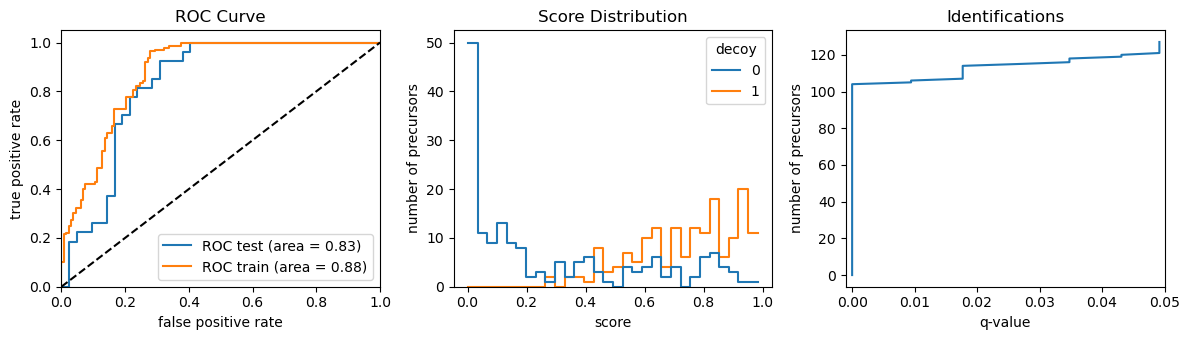

2023-02-06 17:31:32 INFO: === checking if recalibration conditions were reached, target 100 precursors ===
2023-02-06 17:31:32 INFO: Accumulated precursors: 341, 0.01 FDR: 107, 0.001 FDR: 105
2023-02-06 17:31:32 INFO: calibration group: precursor, fitting mz estimator 


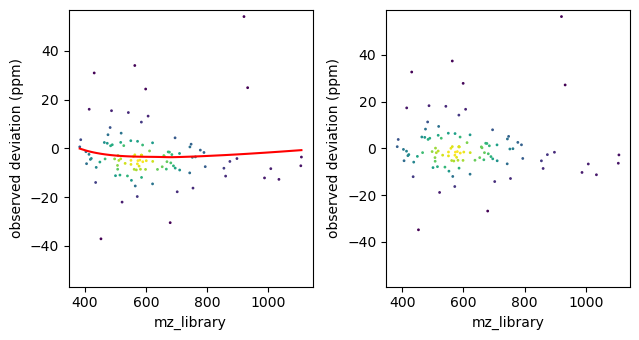

2023-02-06 17:31:32 INFO: calibration group: precursor, fitting rt estimator 


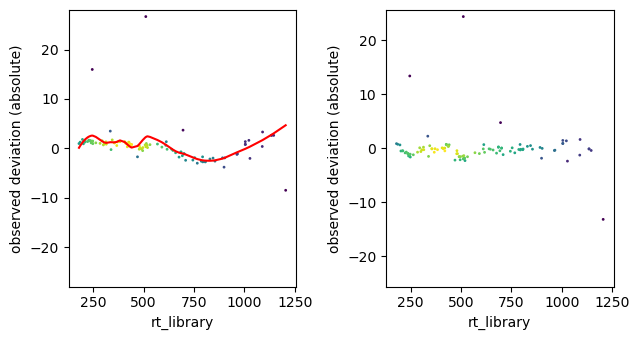

2023-02-06 17:31:32 INFO: calibration group: precursor, fitting mobility estimator 


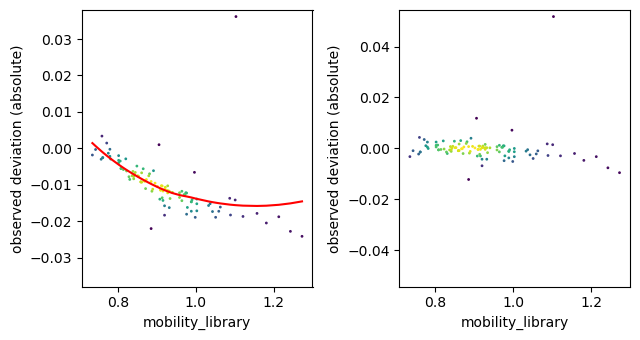

2023-02-06 17:31:32 INFO: calibration group: fragment, fitting mz estimator 


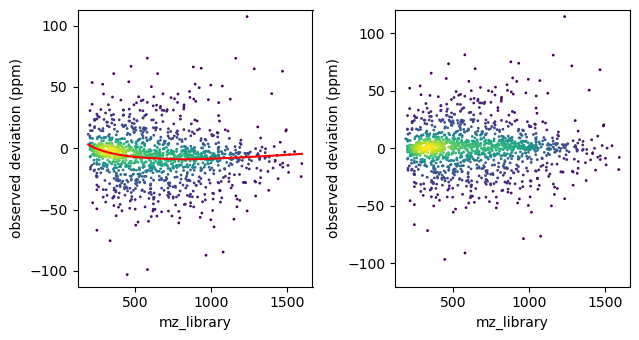

2023-02-06 17:31:32 INFO: calibration group: precursor, predicting mz
2023-02-06 17:31:32 INFO: calibration group: precursor, predicting rt
2023-02-06 17:31:32 INFO: calibration group: precursor, predicting mobility
2023-02-06 17:31:32 INFO: calibration group: fragment, predicting mz
2023-02-06 17:31:32 INFO: === Epoch 1, step 0, extracting elution groups 0 to 267 ===
2023-02-06 17:31:32 INFO: MS1 error: 27.081111408881284, MS2 error: 34.13370261189767, RT error: 30, Mobility error: 0.02
100%|██████████| 201/201 [00:02<00:00, 74.74it/s]
2023-02-06 17:31:35 INFO: Extracted candidates for 201 target precursors (100.00%)
2023-02-06 17:31:35 INFO: Extracted candidates for 197 decoy precursors  (100.00%)
100%|██████████| 398/398 [00:00<00:00, 15629.87it/s]
2023-02-06 17:31:45 INFO: Scored 398 candidates
2023-02-06 17:31:45 INFO: 10.95% of targets failed, 18.27% of decoys failed
2023-02-06 17:31:45 INFO: number of dfs in features: 1, total number of features: 340


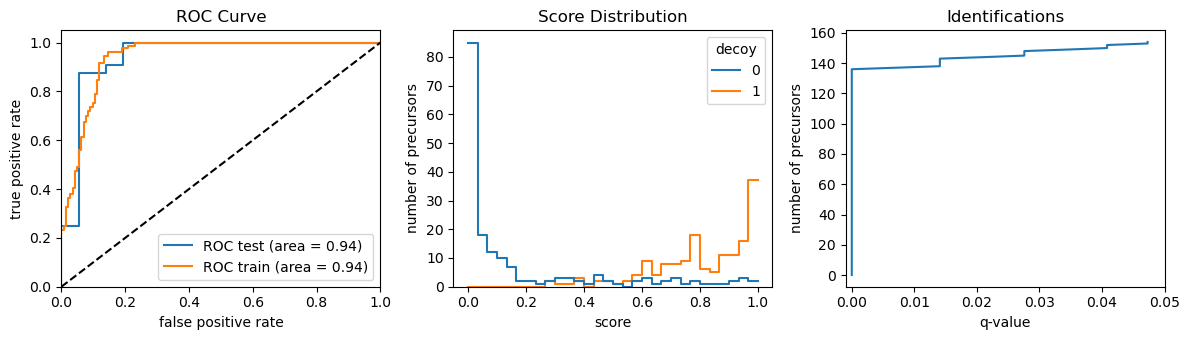

2023-02-06 17:31:45 INFO: === checking if recalibration conditions were reached, target 200 precursors ===
2023-02-06 17:31:45 INFO: Accumulated precursors: 339, 0.01 FDR: 138, 0.001 FDR: 137
2023-02-06 17:31:45 INFO: calibration group: precursor, fitting mz estimator 


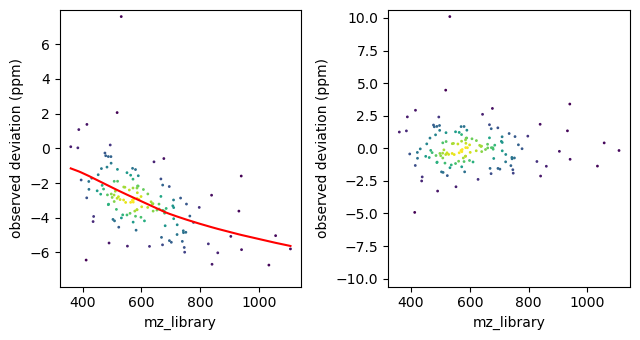

2023-02-06 17:31:45 INFO: calibration group: precursor, fitting rt estimator 


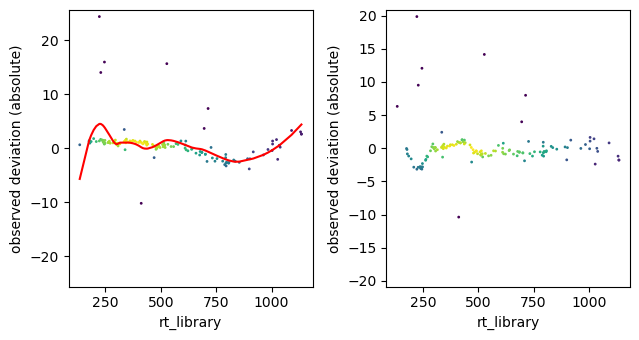

2023-02-06 17:31:45 INFO: calibration group: precursor, fitting mobility estimator 


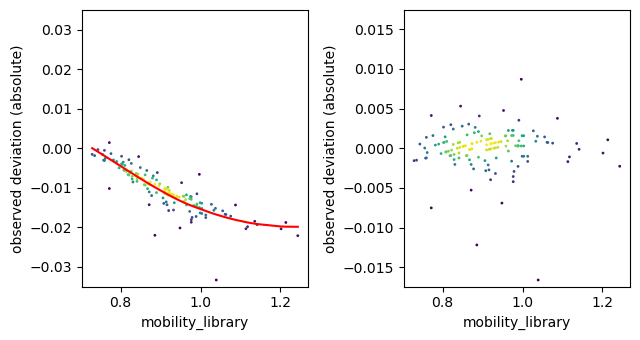

2023-02-06 17:31:45 INFO: calibration group: fragment, fitting mz estimator 


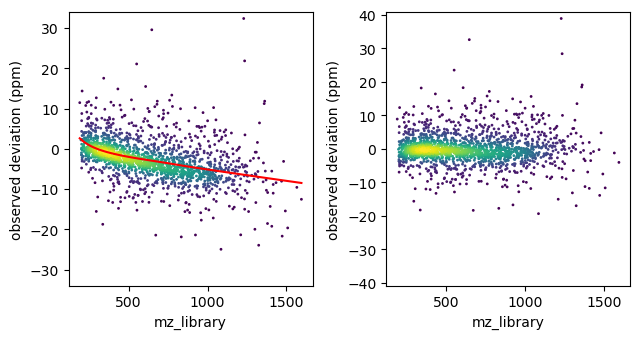

2023-02-06 17:31:45 INFO: calibration group: precursor, predicting mz
2023-02-06 17:31:45 INFO: calibration group: precursor, predicting rt
2023-02-06 17:31:45 INFO: calibration group: precursor, predicting mobility
2023-02-06 17:31:45 INFO: calibration group: fragment, predicting mz
2023-02-06 17:31:45 INFO: Performing final calibration with all precursors
2023-02-06 17:31:45 INFO: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.02
100%|██████████| 267/267 [00:01<00:00, 193.61it/s]
2023-02-06 17:31:47 INFO: Extracted candidates for 267 target precursors (100.00%)
2023-02-06 17:31:47 INFO: Extracted candidates for 260 decoy precursors  (100.00%)
100%|██████████| 527/527 [00:00<00:00, 15617.22it/s]
2023-02-06 17:31:54 INFO: Scored 527 candidates
2023-02-06 17:31:54 INFO: 11.61% of targets failed, 24.23% of decoys failed


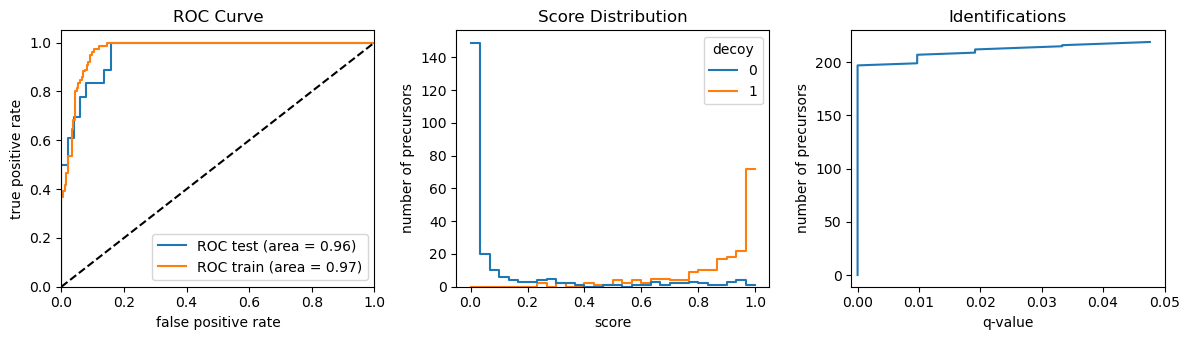

2023-02-06 17:31:54 INFO: calibration group: precursor, fitting mz estimator 


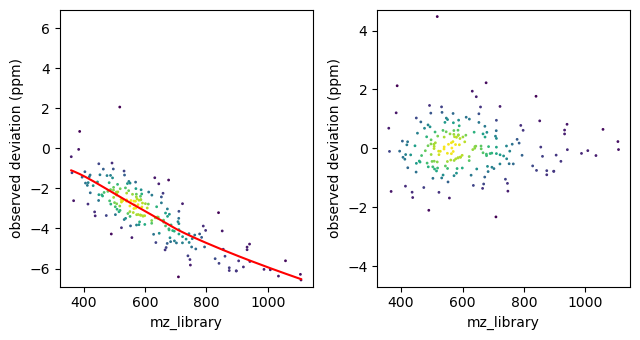

2023-02-06 17:31:54 INFO: calibration group: precursor, fitting rt estimator 


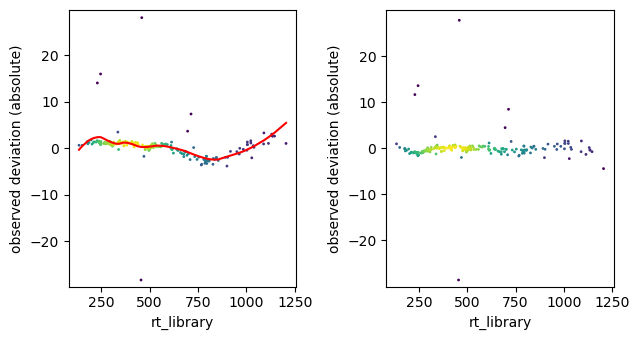

2023-02-06 17:31:55 INFO: calibration group: precursor, fitting mobility estimator 


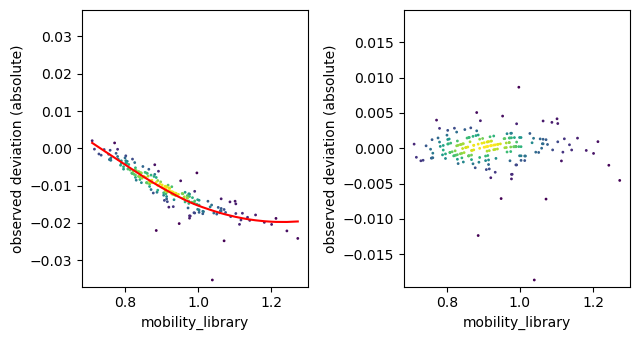

2023-02-06 17:31:55 INFO: calibration group: fragment, fitting mz estimator 


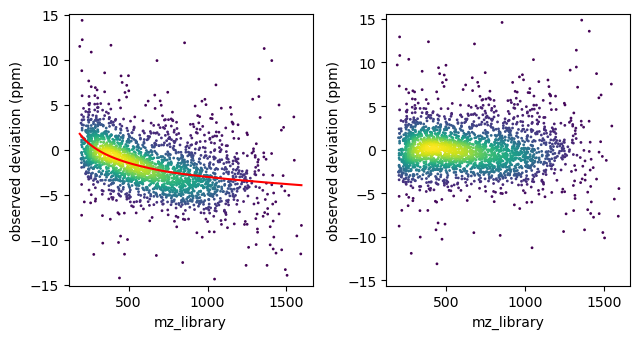

2023-02-06 17:31:55 INFO: calibration group: precursor, predicting mz
2023-02-06 17:31:55 INFO: calibration group: precursor, predicting rt
2023-02-06 17:31:55 INFO: calibration group: precursor, predicting mobility
2023-02-06 17:31:55 INFO: calibration group: fragment, predicting mz
2023-02-06 17:31:55 INFO: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.02
100%|██████████| 267/267 [00:01<00:00, 190.90it/s]
2023-02-06 17:31:56 INFO: Extracted candidates for 267 target precursors (100.00%)
2023-02-06 17:31:56 INFO: Extracted candidates for 260 decoy precursors  (100.00%)
100%|██████████| 1054/1054 [00:00<00:00, 15888.54it/s]
2023-02-06 17:32:04 INFO: Scored 1054 candidates
2023-02-06 17:32:04 INFO: 12.92% of targets failed, 23.08% of decoys failed


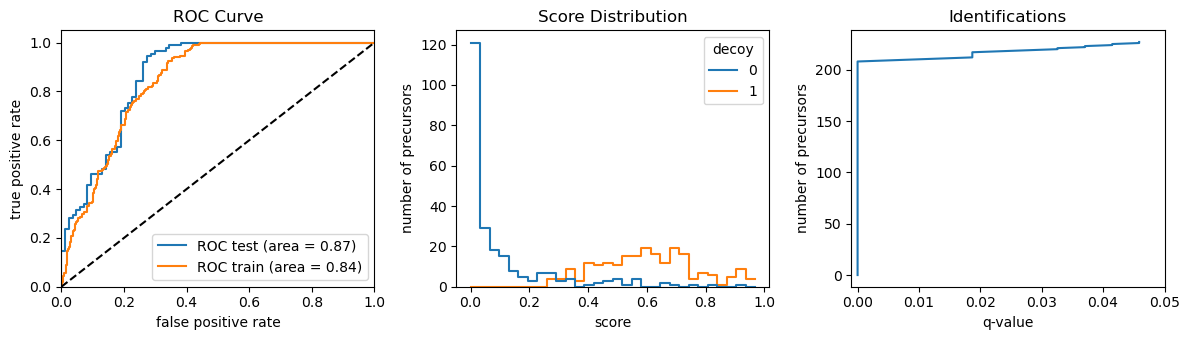

2023-02-06 17:32:04 INFO: === extraction finished, 0.05 FDR: 218, 0.01 FDR: 209, 0.001 FDR: 209 ===


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/raw_data/synchro_PASEF_4prot/dda_psms_maxquant/alpha_lib.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

plan = Plan(raw_files)
plan.from_spec_lib_base(test_lib)

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():

    raw_name = precursors_flat.iloc[0]['raw_name']

    workflow = Workflow(
        plan.config, 
        dia_data, 
        precursors_flat, 
        fragments_flat
        )
    
    workflow.calibration()
    df = workflow.extraction(keep_decoys=True)

In [4]:
precursors_flat

,elution_group_idx,precursor_idx,decoy,frag_start_idx,frag_stop_idx,charge,rt_library,mobility_library,mz_library,sequence,...,i_1,i_2,i_3,i_4,i_5,nAA,raw_name,mz_calibrated,rt_calibrated,mobility_calibrated
0,0,0,0,0,6,2,381.222,0.847029,497.716882,DYSQYYR,...,0.306525,0.097403,0.022824,0.004329,0.000000,7,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,497.715783,382.674249,0.839577
1,7,13,1,3835,3843,2,240.450,0.814459,434.747985,LSVLHDK,...,0.285549,0.078585,0.015989,0.002634,0.000000,7,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,434.747250,241.685789,0.809082
2,7,12,0,46,54,2,240.450,0.814459,449.744388,LCVLHEK,...,0.279657,0.103842,0.028183,0.006053,0.001074,7,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,449.743575,241.685789,0.809082
3,6,11,0,39,46,2,488.802,0.804269,421.242535,PVLEDLR,...,0.280581,0.075614,0.015108,0.002449,0.000000,7,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,421.241865,488.229152,0.799561
4,5,9,0,32,39,2,411.726,0.779789,404.221603,TFAEALR,...,0.276939,0.072062,0.013874,0.002163,0.000000,7,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,404.221006,412.130856,0.776713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,264,522,1,7479,7500,3,1204.920,1.103485,913.763277,ALWNAYIDNLMADGTCQDAAIVGSK,...,0.291041,0.242502,0.147861,0.072436,0.029955,25,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,913.758273,1209.982209,1.085518
523,265,523,0,3762,3791,4,827.100,0.990853,722.118634,KIEPELDGSSPVTSHDSSTNGLINFIK,...,0.307072,0.249004,0.142484,0.064170,0.024111,27,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,722.115634,824.829790,0.976023
524,265,524,1,7500,7528,4,827.100,0.990853,715.110809,KVEPELDGSSPVTSHDSSTNGLINFVK,...,0.309295,0.247666,0.140132,0.062465,0.023248,27,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,715.107877,824.829790,0.976023
525,266,525,0,3791,3815,4,1090.380,1.002955,743.157828,LLSHSLLVTLASHLPSDFTPAVHASLDK,...,0.297748,0.255477,0.152901,0.071404,0.027632,28,20220923_TIMS03_PaSk_SA_4prot_HeLa_Evo05_21min...,743.154625,1092.059466,0.987717


In [13]:
from alphadia.extraction import candidateselection

selection = candidateselection.MS1CentricCandidateSelection(
    dia_data,
    precursors_flat,
    rt_tolerance=15,
    mz_tolerance=15,
    mobility_tolerance=0.02,
    candidate_count=3,
    thread_count=1,
    precursor_mz_column='mz_calibrated',
    rt_column='rt_calibrated',
    mobility_column='mobility_calibrated',
    debug=False
)

candidates = selection()

100%|██████████| 267/267 [00:01<00:00, 184.02it/s]
2023-02-06 17:40:02 INFO: Extracted candidates for 267 target precursors (100.00%)
2023-02-06 17:40:02 INFO: Extracted candidates for 260 decoy precursors  (100.00%)


In [14]:
from alphadia.extraction import quadrupole, scoring, features
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [15]:

extraction = scoring.MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=20,
    precursor_mz_column = 'mz_calibrated',
    fragment_mz_column = 'mz_calibrated',
    debug=False,
)

feature_df, fragment_df = extraction()


100%|██████████| 1556/1556 [00:00<00:00, 14281.79it/s]
2023-02-06 17:40:15 INFO: Scored 1556 candidates
2023-02-06 17:40:15 INFO: 14.16% of targets failed, 22.98% of decoys failed


In [ ]:
feature_df['correlation_score'] = feature_df['template_frame_correlation'].apply(lambda x: x[0])

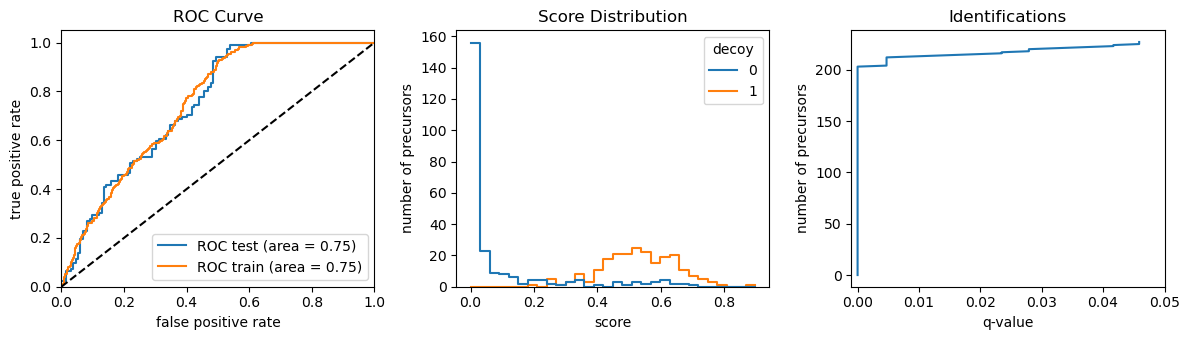

In [19]:
feature_df['precursor_idx'].nunique()
df = scoring.fdr_correction(feature_df, feature_columns=
            ['precursor_mass_error', 
            'precursor_isotope_correlation', 
            'fraction_fragments', 
            'intensity_correlation',
            'sum_precursor_intensity',
            'sum_fragment_intensity',
            'mean_fragment_intensity',
            'mean_fragment_nonzero',
            'rt_error',
            'mobility_error',
            'mean_observation_score',
            'var_observation_score',
            'fragment_frame_correlation',
            'fragment_scan_correlation',
            'template_frame_correlation',
            'template_scan_correlation'
            ]
            )

<AxesSubplot:xlabel='template_frame_correlation', ylabel='Count'>

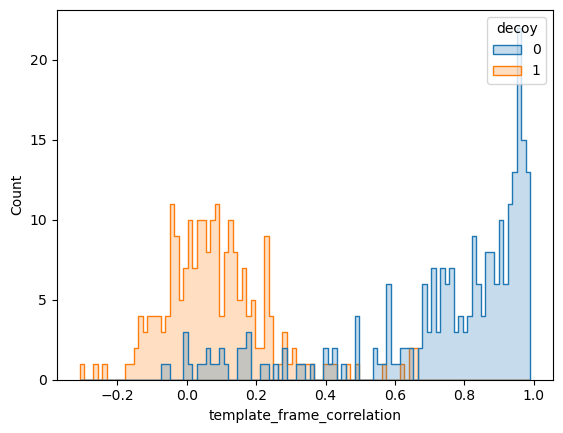

In [24]:
sns.histplot(df, x='template_frame_correlation', hue='decoy', stat='count',  bins=100, element='step')

<AxesSubplot:xlabel='fragment_frame_correlation', ylabel='fragment_scan_correlation'>

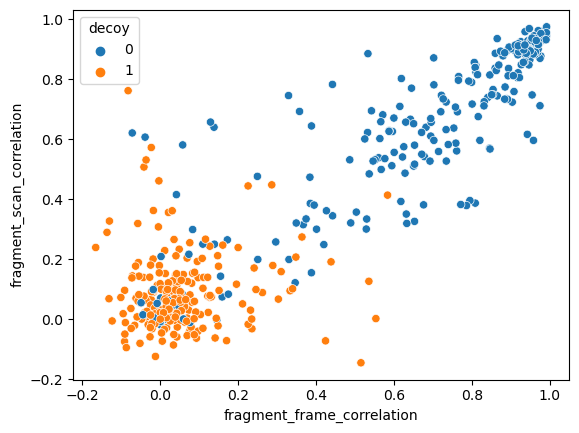

In [26]:
sns.scatterplot(data=df, x='fragment_frame_correlation', y='fragment_scan_correlation', hue='decoy')

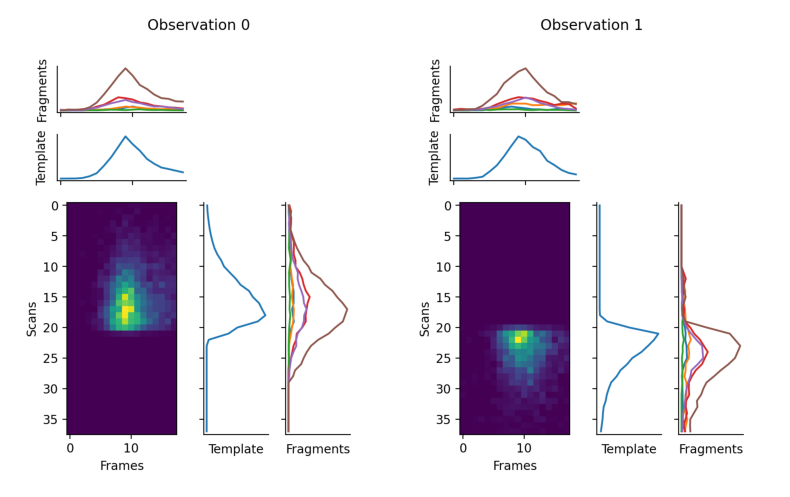

0.9250440287964384
0.9263289384102913
0.9159524391002105
0.9632666939088956


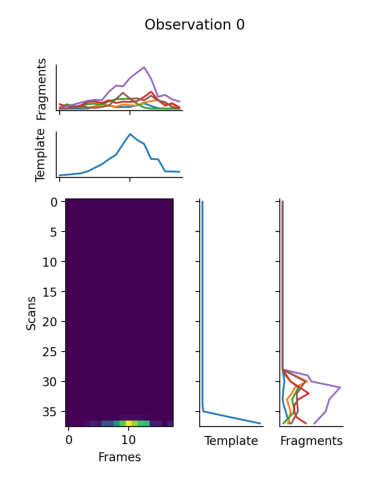

0.8851595405693057
0.5334035372753703
0.3115245538913727
0.7391136837018918


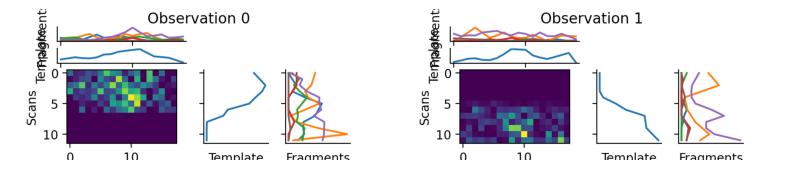

0.05086350037927691
0.21127531908891722
0.02056281214213561
0.39786884992282173


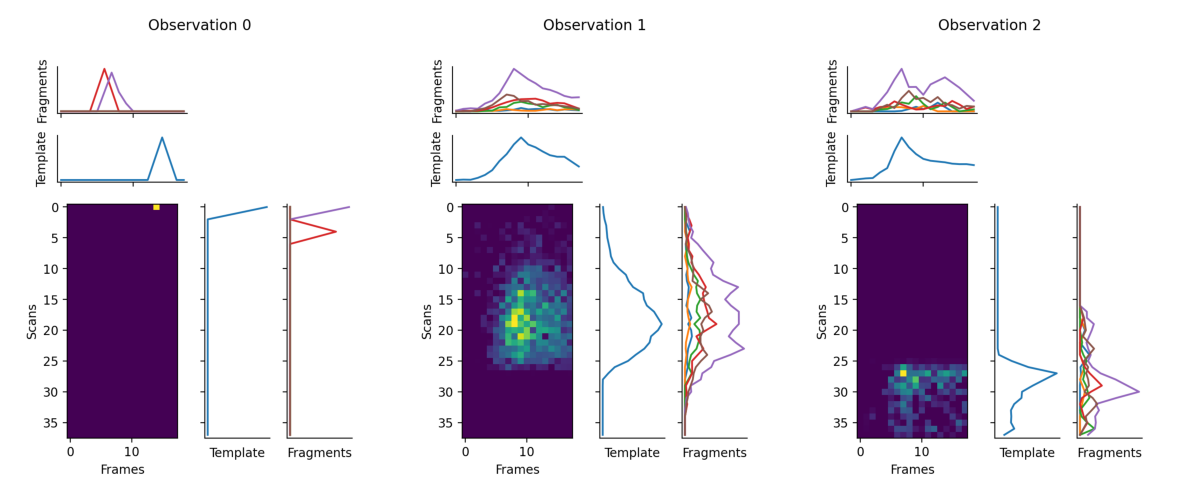

0.7965463206324932
0.7657684506350078
0.8637736734772482
0.8779689945016476


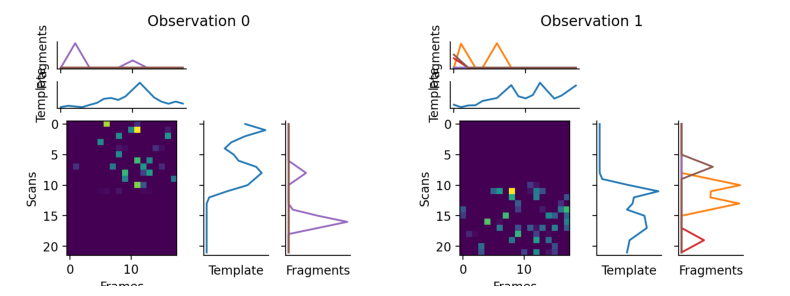

-0.04227495230810258
0.18638688312999294
-0.0012414739969656835
-0.1364164373122768


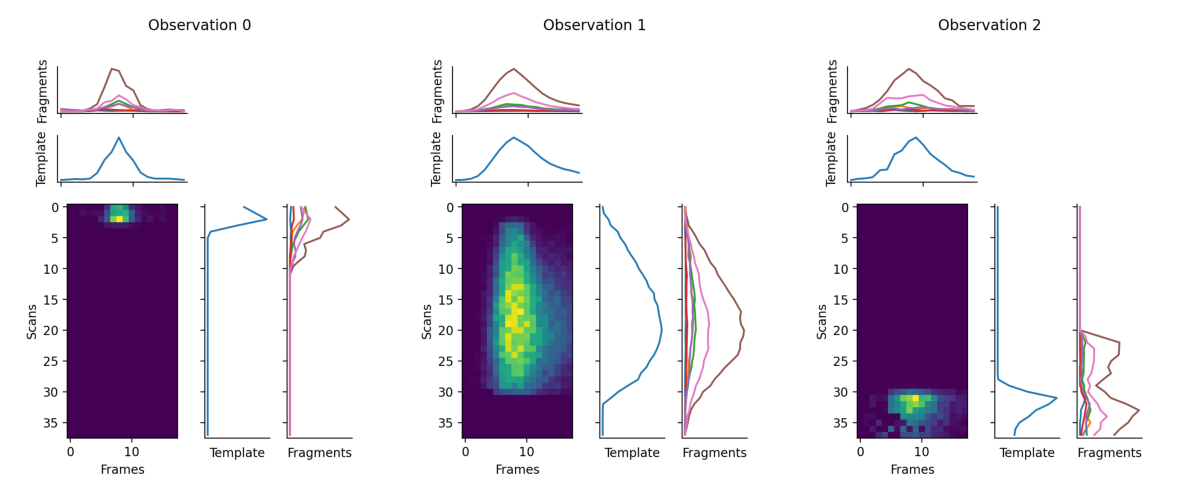

0.9209043823352598
0.9712635576375527
0.9443881276140836
0.9760881706745939


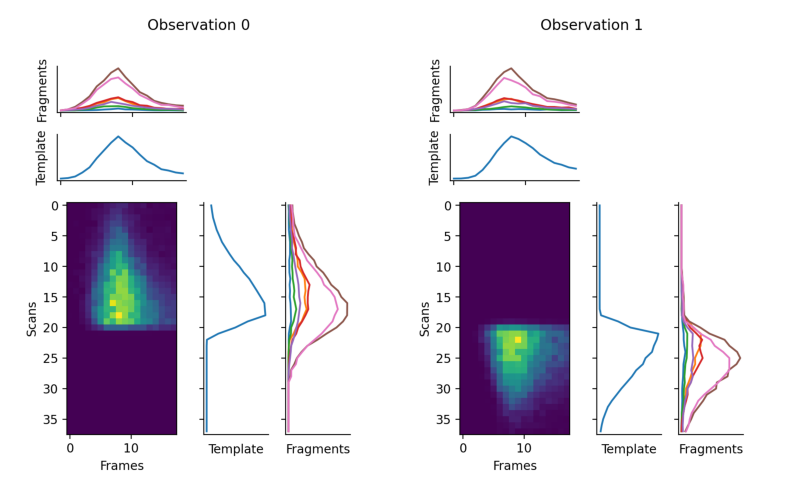

0.9354311787357813
0.9813292409734975
0.9602591694662159
0.9471703121730872


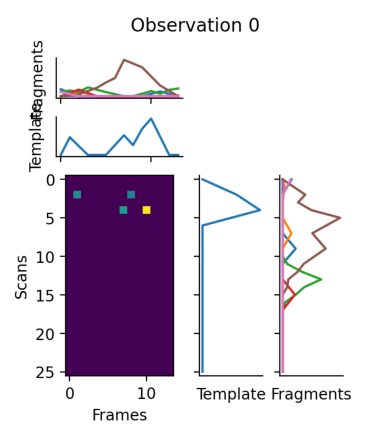

-0.009081271184444094
-0.1402720010853669
-0.005078042406308671
0.005168349922187211


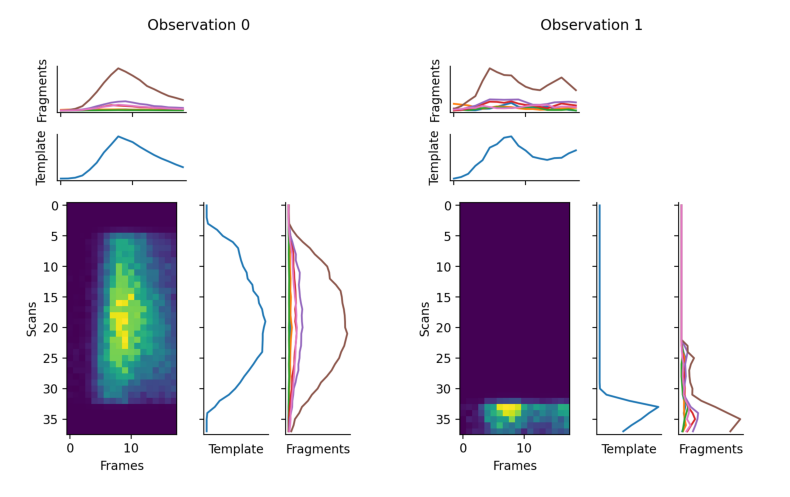

0.9686063704983776
0.9479606513643705
0.9690062589703553
0.966477662904069


In [27]:
from alphadia.extraction import plotting, quadrupole
@nb.njit
def build_feature(
    dense_fragments,
    template,
    fragments

):

    total_fragment_intensity = np.sum(np.sum(dense_fragments[0], axis=-1), axis=-1)
    total_template_intensity = np.sum(np.sum(template, axis=-1), axis=-1)

    fragment_mask_2d = (total_fragment_intensity > 0).astype(np.int8)
    fragment_mask_1d = np.sum(fragment_mask_2d, axis=-1) > 0
    fragment_mask_2d = fragment_mask_2d * np.expand_dims(fragments.intensity, axis=-1)

    # (n_fragments, n_observations, n_frames)
    fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(dense_fragments[0]))
    template_frame_profile = features.or_envelope_2d(features.frame_profile_2d(template))

    # (n_fragments, n_observations, n_scans)
    fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(dense_fragments[0]))
    template_scan_profile = features.or_envelope_2d(features.scan_profile_2d(template))

    

    with nb.objmode:
        plotting.plot_fragment_profile(
            template,
            fragments_scan_profile,
            fragments_frame_profile,
            template_frame_profile,
            template_scan_profile,
        )
    

    # (n_fragments, n_observations)
    fragment_scan_correlation, template_scan_correlation = weighted_correlation(
        fragments_scan_profile,
        template_scan_profile,
        fragment_mask_2d,
    )

    
    # (n_fragments, n_observations)
    fragment_frame_correlation, template_frame_correlation = weighted_correlation(
        fragments_frame_profile,
        template_frame_profile,
        fragment_mask_2d,
    )

    observation_importance = quadrupole.calculate_observation_importance(template)
    weights = fragments.intensity / np.sum(fragments.intensity)

    fragment_scan_mean_list = np.sum(fragment_scan_correlation * observation_importance, axis = -1)
    fragment_scan_mean_agg = np.sum(fragment_scan_mean_list * weights)
    print(fragment_scan_mean_agg)

    fragment_frame_mean_list = np.sum(fragment_frame_correlation * observation_importance, axis = -1)
    fragment_frame_mean_agg = np.sum(fragment_frame_mean_list * weights)
    print(fragment_frame_mean_agg)

    template_scan_mean_list = np.sum(template_scan_correlation * observation_importance, axis = -1)
    template_scan_mean_agg = np.sum(template_scan_mean_list * weights)
    print(template_scan_mean_agg)

    template_frame_mean_list = np.sum(template_frame_correlation * observation_importance, axis = -1)
    template_frame_mean_agg = np.sum(template_frame_mean_list * weights)
    print(template_frame_mean_agg)


for candidate in candidate_container[:]:
    if len(candidate.template) > 0:
        res = build_feature(
            candidate.dense_fragments,
            candidate.template,
            candidate.fragments
        )
    

In [15]:
arr = np.ones((5,5))
mask = np.ones((5,5))
np.fill_diagonal(mask,0)

features.weighted_mean_a1(arr, mask)

array([1., 1., 1., 1., 1.])

In [298]:
fragment_profile

array([], shape=(0, 1, 1), dtype=float64)

In [264]:
dense_fragments = candidate_container[8].dense_fragments[0]
dense_fragments = dense_fragments

In [265]:
template = candidate_container[8].template

In [266]:
import numba as nb

@nb.guvectorize([(nb.float64[:,:], nb.float64[:])], '(n, k)->(k)')
def frame_profile(x, res):
    res[:] = np.sum(x, axis=0)

@nb.guvectorize([(nb.float64[:], nb.float64[:])], '(n)->()')
def scan_profile(x, res):
    res[0] = np.sum(x)

@nb.guvectorize([
    (nb.float64[:], nb.float64[:]),
    (nb.float32[:], nb.float32[:]),
    ], '(n)->(n)')
def or_envelope(x, res):
    res[:] = x
    for i in range(1, len(x) - 1):
        if (x[i] < x[i-1]) or (x[i] < x[i+1]):
            res[i] = (x[i-1] + x[i+1]) / 2

@nb.njit
def frame_profile_2d(x):
    return np.sum(x, axis=2)

@nb.njit
def frame_profile_1d(x):
    return np.sum(x, axis=1)

@nb.njit
def scan_profile_2d(x):
    return np.sum(x, axis=3)

@nb.njit
def scan_profile_1d(x):
    return np.sum(x, axis=2)

@nb.njit
def or_envelope_1d(x):
    res = x.copy()
    for a0 in range(x.shape[0]):
        for i in range(1, x.shape[1] - 1):
            if (x[a0, i] < x[a0, i-1]) or (x[a0, i] < x[a0, i+1]):
                res[a0, i] = (x[a0, i-1] + x[a0, i+1]) / 2

@nb.njit
def or_envelope_2d(x):
    res = x.copy()
    for a0  in range(x.shape[0]):
        for a1 in range(x.shape[1]):
            for i in range(1, x.shape[2] - 1):
                if (x[a0, a1, i] < x[a0, a1, i-1]) or (x[a0, a1, i] < x[a0, a1, i+1]):
                    res[a0, a1, i] = (x[a0, a1, i-1] + x[a0, a1, i+1]) / 2
    return res


In [267]:
fragments_frame_profile = or_envelope_2d(frame_profile_2d(dense_fragments))
fragments_scan_profile = or_envelope_2d(scan_profile_2d(dense_fragments))

template_frame_profile = or_envelope_2d(frame_profile_2d(template))
template_scan_profile = or_envelope_2d(scan_profile_1d(template))

In [238]:
fragments_scan_profile[:,i_observations].shape

(6, 24)

In [268]:
# (n_fragments, n_observations)
total_fragment_intensity = np.sum(np.sum(dense_fragments, axis=-1), axis=-1)
fragment_mask_2d = (total_fragment_intensity > 0).astype(np.int8)
fragment_mask_2d = fragment_mask_2d * np.expand_dims(candidate_container[8].fragments.intensity, axis=-1)


In [269]:
fragment_mask_2d

array([[0.24182796],
       [0.595964  ],
       [0.88439834],
       [0.63842964],
       [0.        ],
       [1.        ],
       [0.18416822]], dtype=float32)

In [271]:






weighted_correlation(
    fragments_frame_profile,
    template_frame_profile,
    #np.ones_like(fragment_mask_2d),
    fragment_mask_2d,
)
#fragment_mask_2d.shape

(array([[-0.02344709],
        [ 0.02872656],
        [-0.02673932],
        [ 0.02678676],
        [ 0.        ],
        [-0.11304981],
        [-0.00813548]]),
 array([[ 0.0783527 ],
        [-0.1418633 ],
        [-0.4266822 ],
        [-0.07030189],
        [ 0.        ],
        [ 0.53681187],
        [-0.15624309]]))

In [185]:
mask_2d = fragment_mask_2d[:,[0]]*fragment_mask_2d[:,0]
np.fill_diagonal(mask_2d, False)

In [201]:
weighted_mean_a1(
    np.array([[1,2,np.nan],[4,5,6]]),
    np.array([[1,0,0],[1,1,1]])
)

array([1., 5.])

In [40]:

fragments_frame_profile = or_envelope(frame_profile(dense_fragments))
fragments_scan_profile = or_envelope(scan_profile(dense_fragments))

precursors_frame_profile = or_envelope(frame_profile(template))
precursors_scan_profile = or_envelope(scan_profile(template))

template_scan_profile = or_envelope(scan_profile(template))
template_frame_profile = or_envelope(frame_profile(template))

In [142]:
fragments_frame_profile[:,0]

array([[ 72. ,  36. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,  25. ,  50. ,  25. ,   0. ],
       [  0. ,  24.5,  49. ,  24.5,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   5. ,  10. ],
       [ 45. ,  58.5,  45.5,  91. ,  67. ,  43. ,  21.5,   0. ,   0. ,
         26.5,  53. ,  26.5,  66. ,  80. ],
       [  0. ,  34. ,  68. ,  34. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,  10.5,  21. ,  54. ,  87. , 142. , 187. , 374. , 336. ,
        298. , 204. , 110. ,  55. ,   0. ],
       [ 45. ,  22.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ]])

In [56]:
@ nb.njit
def mean_correlation(
    fragment_profile,
    template_profile
):
    correlation = np.corrcoef(fragment_profile, template_profile)
    
    #mean_frame_corr = utils.amean0(correlation[:-1,:-1])-1/len(correlation[:-1,:-1])

    return correlation


In [64]:
candidate_container[1].fragments.intensity

array([0.07198651, 0.19005746, 0.02673045, 0.5544613 , 0.35620964,
       1.        ], dtype=float32)

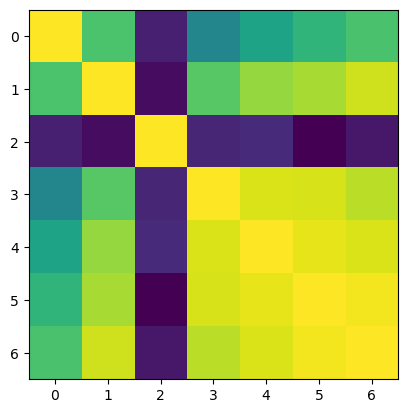

In [63]:
plt.imshow(mean_correlation(fragments_frame_profile[:,0], template_frame_profile[0,0]))

(array([[0.86716093, 0.71358222],
        [0.94287834, 0.71498929],
        [0.68650563, 0.64490305],
        [0.97076304, 0.93774732],
        [0.97676986, 0.9281137 ],
        [0.98133306, 0.94734774]]),
 array([[0.90399755, 0.71064102],
        [0.97638722, 0.69680008],
        [0.68627585, 0.67253099],
        [0.9653329 , 0.96414548],
        [0.98109228, 0.97758767],
        [0.99394674, 0.98971407]]))

In [68]:
@nb.njit
def weighted_precursor_correlation(
    fragment_profile,
    weights,
):
    n_fragemts = fragment_profile.shape[0]
    n_observations = fragment_profile.shape[1]

    weights = weights / np.sum(weights)

    weighted_correlation = np.zeros((n_fragemts, n_observations))

    for i_observations in range(n_observations):
        correlation = np.corrcoef(fragments_frame_profile[:,i_observations])
        weighted_correlation[:,i_observations] = np.sum(correlation * weights, axis = 1)

    return weighted_correlation

In [72]:
correlation

array([[1.        , 0.90487354, 0.69469824, 0.81882375, 0.85880451,
        0.8848184 ],
       [0.90487354, 1.        , 0.67558793, 0.91322619, 0.94752005,
        0.95669003],
       [0.69469824, 0.67558793, 1.        , 0.70111319, 0.70491204,
        0.66495508],
       [0.81882375, 0.91322619, 0.70111319, 1.        , 0.98104364,
        0.97997089],
       [0.85880451, 0.94752005, 0.70491204, 0.98104364, 1.        ,
        0.98744325],
       [0.8848184 , 0.95669003, 0.66495508, 0.97997089, 0.98744325,
        1.        ]])

In [76]:
correlation * weight

array([[0.03272939, 0.07819152, 0.00844285, 0.20641846, 0.13908709,
        0.40229161],
       [0.02961596, 0.08641154, 0.0082106 , 0.2302165 , 0.15345496,
        0.43496877],
       [0.02273705, 0.0583786 , 0.01215327, 0.17674463, 0.11416355,
        0.30232854],
       [0.02679961, 0.07891328, 0.00852082, 0.25209144, 0.15888425,
        0.44555365],
       [0.02810815, 0.08187667, 0.00856699, 0.2473127 , 0.16195431,
        0.44895103],
       [0.02895957, 0.08266906, 0.00808138, 0.24704227, 0.15992069,
        0.45466009]])

In [81]:
weighted_correlation * 

0.9672866318026165

In [49]:
from alphadia.extraction import utils, plotting
correlations = utils.calculate_correlations(
        template_scan_profile[:,0], 
        fragments_scan_profile[:,0]
)

correlations

array([[0.72986965, 0.70877533, 0.534978  , 0.74306852, 0.72205893,
        0.70986197],
       [0.94974716, 0.92042013, 0.66737722, 0.95785007, 0.94047241,
        0.92824004]])

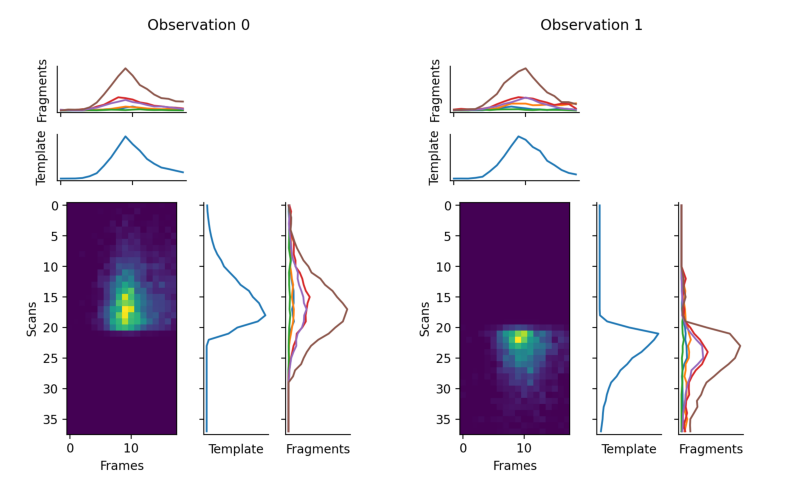

In [324]:
scan_profile = np.sum(dense_fragments, axis = -1)
scan_profile.shape

(6, 2, 38)

In [287]:
a = np.arange(20).reshape(20)
h(a)

190

In [170]:
template_scan_profile = np.sum(template, axis=-1)
fragment_scan_profile = np.sum(dense_fragments, axis=-1)

In [332]:
fragment_scan_profile.shape

(6, 2, 38)

In [333]:

template_scan_profile.shape

(1, 2, 38)

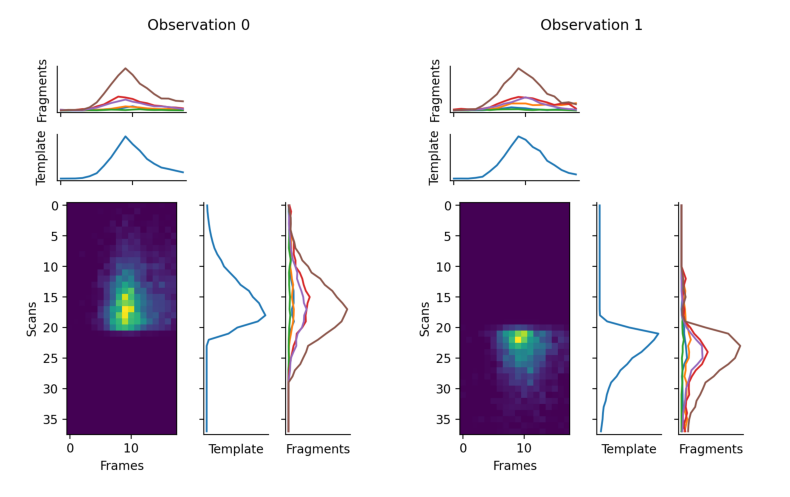

In [131]:
print(n_observations)

2


In [71]:
feature_df['precursor_mass_error'] = np.abs(feature_df['precursor_mass_error'])
feature_df['rt_error'] = np.abs(feature_df['rt_error'])

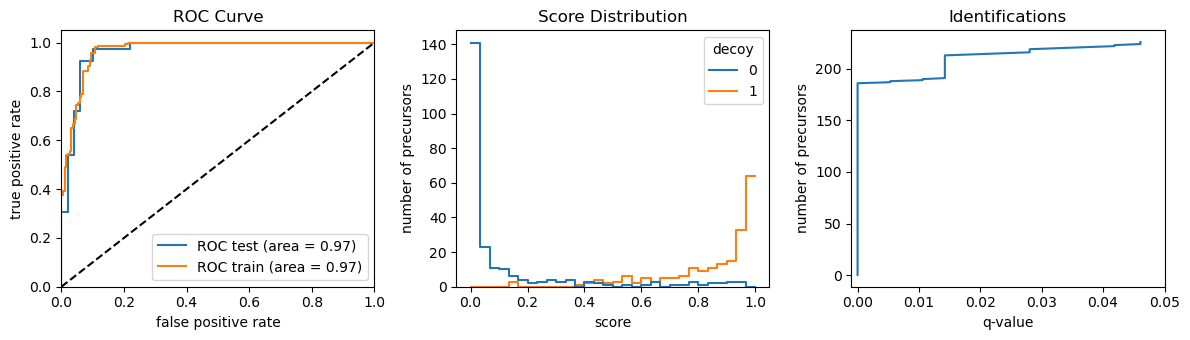

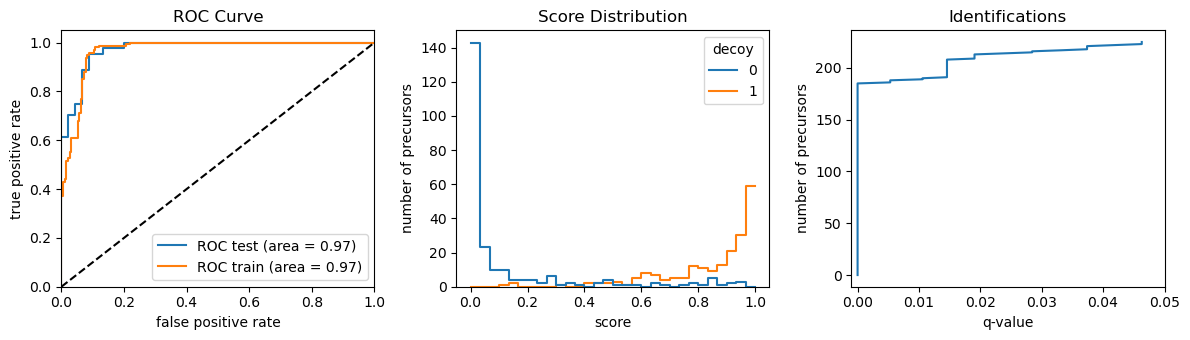

In [11]:
df = scoring.fdr_correction(feature_df)
df = scoring.fdr_correction(df)

In [120]:
df_sig = df[df['qval'] <= 0.01]


ValueError: Could not interpret value `decoy` for parameter `hue`

In [77]:
df.columns

Index(['precursor_idx', 'elution_group_idx', 'charge', 'precursor_mass_error',
       'mz_library', 'mz_observed', 'precursor_isotope_correlation',
       'sum_precursor_intensity', 'n_fragments_matched', 'n_fragments',
       'fraction_fragments', 'fragment_corrcoeff', 'sum_fragment_intensity',
       'mean_fragment_intensity', 'mean_fragment_nonzero', 'n_observations',
       'mean_observation_score', 'var_observation_score',
       'base_width_mobility', 'base_width_rt', 'rt_observed',
       'mobility_observed', 'decoy', 'mz_calibrated', 'rt_library', 'rt_error',
       'mobility_library', 'mobility_error', 'proba', 'qval'],
      dtype='object')

In [20]:
missing_ids = np.setdiff1d(candidates[candidates['decoy'] == 0]['precursor_idx'].unique(), ids)

In [21]:
missing_ids

array([221, 301, 315, 324, 344, 350, 367, 373, 377, 382, 384, 414, 434,
       458, 460, 461, 466, 467, 479, 496, 498, 499, 502, 504, 506, 510],
      dtype=uint32)

In [40]:
from tqdm import tqdm
candidate_container = cc

fragment_collection = {'precursor_idx': []}
feature_collection = []

# initialize fragment collection with empty lists
for key in candidate_container[0].fragment_features.keys():
    fragment_collection[key] = []

for i, c in enumerate(tqdm(candidate_container)):

    n = 0
    for key, item in c.fragment_features.items():
        
        fragment_collection[key].append(item)
        n = len(item)
        
    fragment_collection['precursor_idx'].append(np.repeat(c.precursor_idx[0], n))
    

    if i > 10:
        break
    #feature_collection.append(self._collect_candidate(c))

for key, item in fragment_collection.items():
    fragment_collection[key] = np.concatenate(item)

  2%|▏         | 11/527 [00:00<00:00, 28427.20it/s]


In [41]:
cc[0].precursor_idx[0]

1

In [42]:
for key, item in fragment_collection.items():
    print(key, item.shape)

precursor_idx (72,)
mz_library (72,)
mz_observed (72,)
mass_error (72,)
intensity (72,)
type (72,)


In [35]:
collection_dict = {}

for key in cc[0].fragment_features.keys():
    collection_dict[key] = []

for c in cc:
    for key, item in c.fragment_features.items():
        collection_dict[key].append(item)

for key, item in cc[0].fragment_features.items():
    collection_dict[key] = np.concatenate(collection_dict[key])

df = pd.DataFrame(collection_dict)

In [40]:
df

,precursor_idx,elution_group_idx,charge,precursor_mass_error,mz_library,mz_observed,precursor_isotope_correlation,sum_precursor_intensity,n_fragments_matched,n_fragments,...,mz_calibrated,rt_library,rt_calibrated,rt_error,mobility_library,mobility_calibrated,mobility_error,proba,qval,significant
0,283,145,2,1.782423,644.858992,644.857849,0.994860,3.592201,13.0,13.0,...,644.856680,561.594,562.479198,0.169056,0.974705,0.960322,0.000238,0.000019,0.000000,True
1,146,75,2,-0.979652,572.320794,572.318604,0.996965,3.332517,11.0,11.0,...,572.319135,829.200,826.955569,0.078000,0.885630,0.875845,-0.001276,0.000020,0.000000,True
2,133,68,2,-0.867346,580.318251,580.316040,0.999900,3.424321,12.0,12.0,...,580.316526,685.260,684.531952,-0.072785,0.881571,0.872019,0.002550,0.000025,0.000000,True
3,101,52,2,-0.106636,569.752615,569.750916,0.997639,3.145959,10.0,11.0,...,569.750977,271.494,273.336572,-0.905786,0.897803,0.887329,0.001465,0.000033,0.000000,True
4,49,26,2,-0.712326,421.758352,421.757416,0.999531,3.416780,7.0,7.0,...,421.757719,432.066,431.096868,1.879908,0.775705,0.772710,0.001644,0.000053,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,355,181,2,-1.138336,724.337044,724.333008,0.789340,1.775728,1.0,18.0,...,724.333872,365.694,367.021269,-4.212096,1.041223,1.024485,-0.007675,0.999832,0.878661,False
449,253,130,3,-4.881660,499.585303,499.581757,0.041439,1.906056,5.0,13.0,...,499.584196,569.088,569.945545,19.645153,0.806307,0.801375,0.005306,0.999834,0.882845,False
451,401,204,2,-412958.156250,834.488162,489.876892,-0.149440,1.416406,1.0,18.0,...,834.483770,581.400,582.167356,21.461551,1.087438,1.069508,0.011311,0.999861,0.887029,False
452,328,167,2,-5.165478,716.388113,716.381287,0.369622,1.741489,1.0,15.0,...,716.385026,300.936,302.285996,-16.386124,0.990853,0.975803,-0.004897,0.999971,0.891213,False


In [47]:
import numba as nb

@nb.njit
def cosine_similarity_1d(template_intensity, fragments_intensity):

    fragment_norm = np.sqrt(np.sum(np.power(fragments_intensity,2),axis=-1))
    template_norm = np.sqrt(np.sum(np.power(template_intensity,2),axis=-1))

    div = (fragment_norm * template_norm) + 0.0001

    return np.sum(fragments_intensity * template_intensity,axis=-1) / div

In [59]:
template_intensity = np.sum(np.sum(cc[0].template, axis=-1), axis=-1)
fragments_intensity = np.sum(np.sum(cc[0].dense_fragments[0], axis=-1), axis=-1)

fragment_mask_2d = fragments_intensity > 0
fragment_mask_1d = np.sum(fragment_mask_2d, axis=-1) > 0

print(fragment_mask_1d)

score = cosine_similarity_1d(template_intensity, fragments_intensity[fragment_mask_1d])

[False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [60]:
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [85]:
#template_dist = template_dist / np.sum(template_dist, axis=-1)
template_dist


array([[0.01846436, 0.90190098, 0.07963466]])

In [94]:

#fragments_dist = fragments_dist/np.sum(fragments_dist, axis=-1, keepdims=True)

fragments_dist

array([[4.69000e+02, 7.78800e+03, 6.13000e+02],
       [2.70400e+03, 8.23770e+04, 4.36000e+03],
       [4.06400e+03, 1.04107e+05, 5.39400e+03],
       [1.04000e+03, 2.52720e+04, 2.70800e+03],
       [6.49200e+03, 8.10560e+04, 3.86400e+03],
       [1.81780e+04, 5.80727e+05, 2.74560e+04],
       [7.00500e+03, 2.52120e+05, 2.23820e+04]])

In [14]:
fragments_flat[['mz_library']].values.astype(np.float32)

array([[279.09753],
       [716.33624],
       [366.12958],
       ...,
       [476.27148],
       [389.23947],
       [276.1554 ]], dtype=float32)

In [109]:
dot = 
dot / 

array([0.99917189, 0.99930477, 0.99916929, 0.99961553, 0.99741934,
       0.99910833, 0.9999734 ])

In [ ]:
@nb.njit
def cosine_similarity_int(a, b):
    div = np.sqrt(np.sum(a))*np.sqrt(np.sum(b))
    if div == 0:
        return 0
    return np.sum((a*b))/div

In [14]:
df.sort_values(by='base_width_mobility')[['base_width_mobility', 'precursor_idx','decoy']]

,base_width_mobility,precursor_idx,decoy
371,0.007112,371,1
109,0.007112,110,1
291,0.007112,292,1
336,0.007112,336,1
55,0.007112,56,1
...,...,...,...
165,0.023922,165,1
164,0.023922,163,0
163,0.023922,164,1
177,0.023922,178,0


In [15]:
df.sort_values('base_width_mobility')[['precursor_idx','elution_group_idx','base_width_mobility','decoy']].head(10)

,precursor_idx,elution_group_idx,base_width_mobility,decoy
371,371,189,0.007112,1
109,110,56,0.007112,1
291,292,149,0.007112,1
336,336,171,0.007112,1
55,56,29,0.007112,1
335,335,171,0.007112,0
247,248,127,0.007112,1
355,355,181,0.007112,1
250,250,128,0.007112,0
228,229,117,0.007112,1


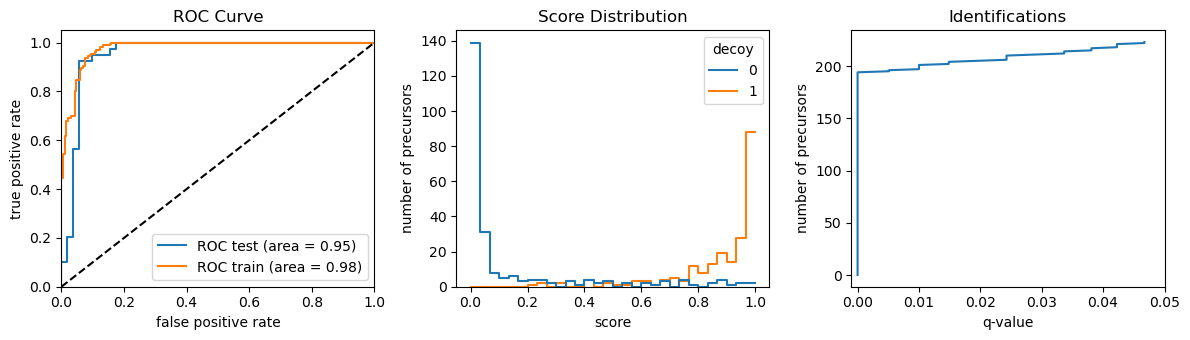

In [39]:
from alphadia.extraction import scoring
df = scoring.fdr_correction(df)


df['significant'] = df['qval'] <= 0.01

In [22]:
df['mean_observation_score']

0      0.996551
2      0.977449
1      0.978115
6      1.000000
3      0.996532
         ...   
459    0.442494
458    0.573631
462    0.375000
460    0.654557
463    0.563516
Name: mean_observation_score, Length: 463, dtype: float64

In [29]:
df = df[df['n_observations'] == 1]
df[['mean_observation_score','precursor_idx','decoy']]

,mean_observation_score,precursor_idx,decoy
0,0.826198,1,1
2,1.000000,2,0
10,1.000000,11,0
11,0.571429,10,1
24,0.777778,24,1
...,...,...,...
509,0.038462,510,0
510,0.080000,509,1
511,0.400000,511,0
513,0.680000,513,0


In [50]:
df.columns

Index(['precursor_idx', 'elution_group_idx', 'charge', 'precursor_mass_error',
       'mz_library', 'mz_observed', 'precursor_isotope_correlation',
       'sum_precursor_intensity', 'n_fragments_matched', 'n_fragments',
       'fraction_fragments', 'fragment_corrcoeff', 'sum_fragment_intensity',
       'mean_fragment_intensity', 'mean_fragment_nonzero', 'n_observations',
       'mean_observation_score', 'var_observation_score',
       'base_width_mobility', 'base_width_rt', 'rt_observed',
       'mobility_observed', 'decoy', 'mz_calibrated', 'rt_library',
       'rt_calibrated', 'rt_error', 'mobility_library', 'mobility_calibrated',
       'mobility_error', 'proba', 'qval', 'significant'],
      dtype='object')

<AxesSubplot:xlabel='rt_error', ylabel='Count'>

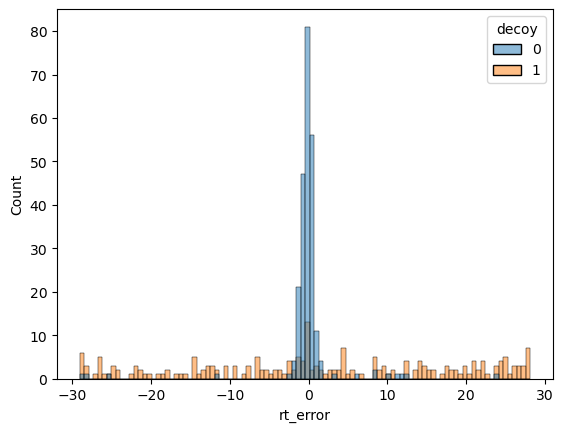

In [51]:
sns.histplot(df, x='rt_error',hue='decoy', bins=100)

<AxesSubplot:xlabel='n_observations', ylabel='mean_observation_score'>

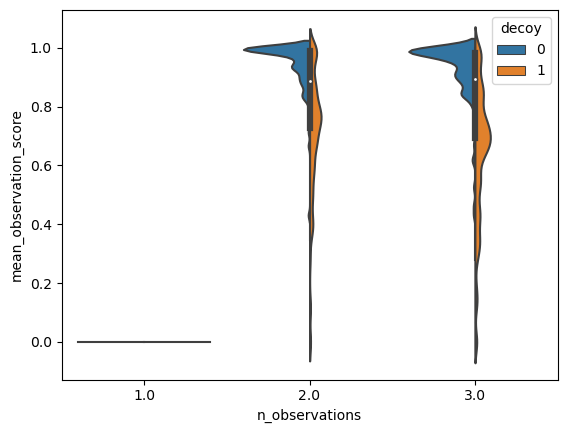

In [7]:
sns.violinplot(data=df, y='mean_observation_score', x='n_observations', hue='decoy', split=True,bw=.15)

<AxesSubplot:xlabel='mean_observation_score', ylabel='var_observation_score'>

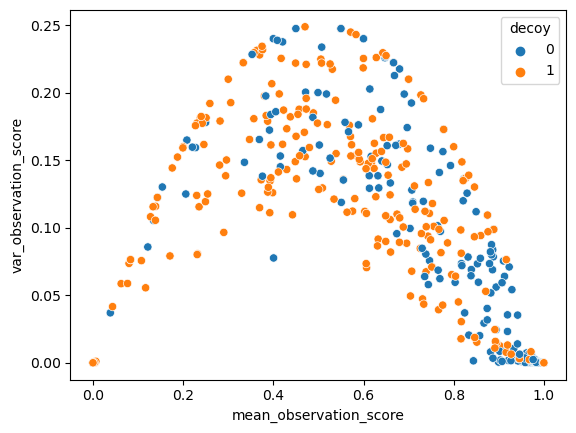

In [11]:
sns.scatterplot(data=df, x='mean_observation_score', y='var_observation_score', hue='decoy')

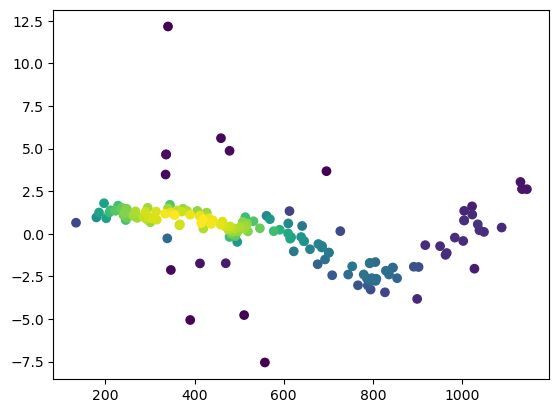

In [15]:
df_sig = df[df['qval'] < 0.05]
utils.density_scatter(df_sig['rt_library'].values, df_sig['rt_error'].values )

In [81]:
import numba as nb



expand_cycle(dia_data.cycle,2)

array([[[[-1.00000000e+00, -1.00000000e+00],
         [-1.00000000e+00, -1.00000000e+00],
         [-1.00000000e+00, -1.00000000e+00],
         ...,
         [-1.00000000e+00, -1.00000000e+00],
         [-1.00000000e+00, -1.00000000e+00],
         [-1.00000000e+00, -1.00000000e+00]],

        [[ 1.11305800e+03,  1.14205800e+03],
         [ 1.11215897e+03,  1.14115897e+03],
         [ 1.11125994e+03,  1.14025994e+03],
         ...,
         [ 2.81456058e+02,  3.10456058e+02],
         [ 2.80557029e+02,  3.09557029e+02],
         [ 0.00000000e+00,  0.00000000e+00]],

        [[ 1.13805800e+03,  1.16705800e+03],
         [ 1.13715897e+03,  1.16615897e+03],
         [ 1.13625994e+03,  1.16525994e+03],
         ...,
         [ 3.06456058e+02,  3.35456058e+02],
         [ 3.05557029e+02,  3.34557029e+02],
         [ 0.00000000e+00,  0.00000000e+00]],

        [[ 1.16305800e+03,  1.19205800e+03],
         [ 1.16215897e+03,  1.19115897e+03],
         [ 1.16125994e+03,  1.19025994e+03],
       